In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Iris = pd.read_csv("C:/Users/HP/OneDrive/Desktop/DataAnalysisFiles/Datasets/iris.csv")
Iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Iris.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

# K-Means with Sepal length Width

In [108]:
X = Iris.iloc[:,[0,1]]
X

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Text(0, 0.5, 'Sepal Width')

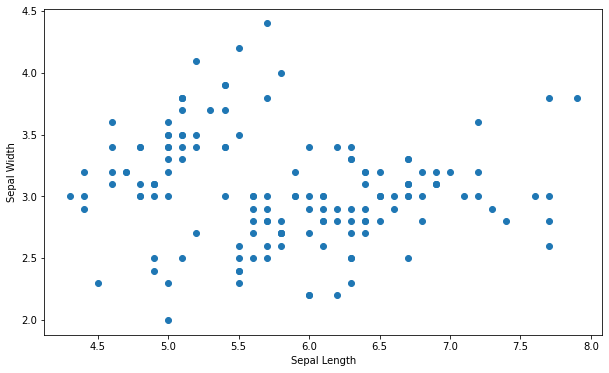

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(Iris["Sepal Length"], Iris["Sepal Width"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Standardization

In [110]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
norm = MinMaxScaler()

In [111]:
#Standardization
X = scaler.fit_transform(X)
X

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

# Inertia

# Using Elbow Method

In [112]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


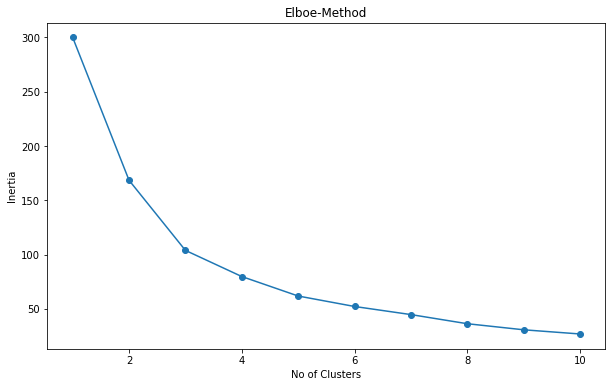

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elboe-Method")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.show()

# From the Elbow method takinh k=3

In [114]:
kmeans = KMeans(n_clusters=3,random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [115]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [116]:
#For centroids
kmeans.cluster_centers_

array([[ 1.09616533,  0.09718925],
       [-0.11190209, -0.95528589],
       [-1.00206653,  0.89510445]])

In [117]:
X[:,0]
X[:,1]

array([ 1.03205722, -0.1249576 ,  0.33784833,  0.10644536,  1.26346019,
        1.95766909,  0.80065426,  0.80065426, -0.35636057,  0.10644536,
        1.49486315,  0.80065426, -0.1249576 , -0.1249576 ,  2.18907205,
        3.11468391,  1.95766909,  1.03205722,  1.72626612,  1.72626612,
        0.80065426,  1.49486315,  1.26346019,  0.56925129,  0.80065426,
       -0.1249576 ,  0.80065426,  1.03205722,  0.80065426,  0.33784833,
        0.10644536,  0.80065426,  2.42047502,  2.65187798,  0.10644536,
        0.33784833,  1.03205722,  0.10644536, -0.1249576 ,  0.80065426,
        1.03205722, -1.74477836,  0.33784833,  1.03205722,  1.72626612,
       -0.1249576 ,  1.72626612,  0.33784833,  1.49486315,  0.56925129,
        0.33784833,  0.33784833,  0.10644536, -1.74477836, -0.58776353,
       -0.58776353,  0.56925129, -1.51337539, -0.35636057, -0.8191665 ,
       -2.43898725, -0.1249576 , -1.97618132, -0.35636057, -0.35636057,
        0.10644536, -0.1249576 , -0.8191665 , -1.97618132, -1.28

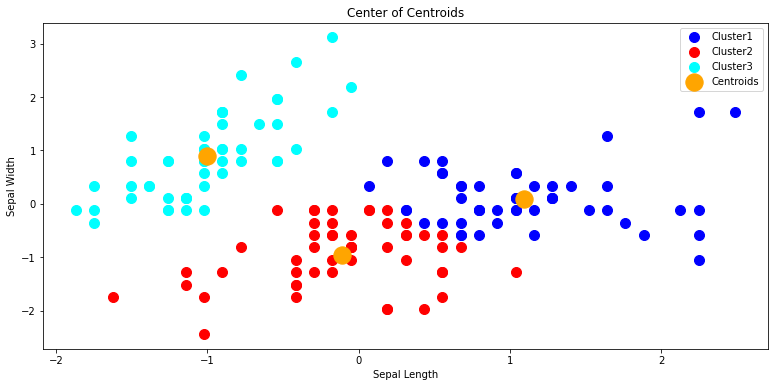

In [118]:
#Visualize the data
plt.figure(figsize=(13,6))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c="blue", label ="Cluster1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c="red", label ="Cluster2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c="cyan", label ="Cluster3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="orange", label="Centroids")
plt.title("Center of Centroids")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

In [119]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.4314195843519521

# K-Means with Sepal length Width

In [120]:
Iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [121]:
X = Iris.iloc[:,[2,3]]
X

,Petal Length,Petal Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'Petal Width')

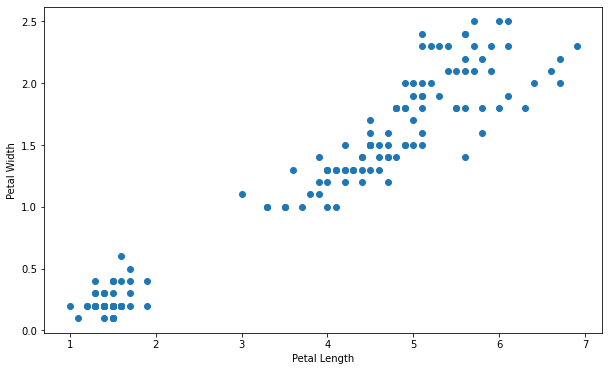

In [122]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.scatter(Iris["Petal Length"], Iris["Petal Width"])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Standardization

In [123]:
X = scaler.fit_transform(X)
X

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

# Using Elbow Method with Inertia

In [124]:
from sklearn.cluster import KMeans
wcss1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss1.append(kmeans.inertia_)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


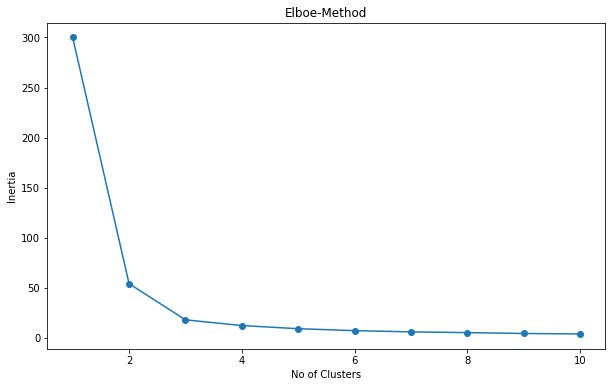

In [125]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss1, marker='o')
plt.title("Elboe-Method")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.show()

# From the above Elbow mthod taking k=3

In [126]:
kmeans = KMeans(n_clusters=3,random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [128]:
kmeans.cluster_centers_

array([[ 1.02813193,  1.12749028],
       [-1.30487835, -1.25512862],
       [ 0.30564587,  0.16609419]])

In [129]:
X[:,0].shape
X[:,1]

array([-1.31297673, -1.31297673, -1.31297673, -1.31297673, -1.31297673,
       -1.05003079, -1.18150376, -1.31297673, -1.31297673, -1.4444497 ,
       -1.31297673, -1.31297673, -1.4444497 , -1.4444497 , -1.31297673,
       -1.05003079, -1.05003079, -1.18150376, -1.18150376, -1.18150376,
       -1.31297673, -1.05003079, -1.31297673, -0.91855782, -1.31297673,
       -1.31297673, -1.05003079, -1.31297673, -1.31297673, -1.31297673,
       -1.31297673, -1.05003079, -1.4444497 , -1.31297673, -1.4444497 ,
       -1.31297673, -1.31297673, -1.4444497 , -1.31297673, -1.31297673,
       -1.18150376, -1.18150376, -1.31297673, -0.78708485, -1.05003079,
       -1.18150376, -1.31297673, -1.31297673, -1.31297673, -1.31297673,
        0.26469891,  0.39617188,  0.39617188,  0.13322594,  0.39617188,
        0.13322594,  0.52764485, -0.26119297,  0.13322594,  0.26469891,
       -0.26119297,  0.39617188, -0.26119297,  0.26469891,  0.13322594,
        0.26469891,  0.39617188, -0.26119297,  0.39617188, -0.12

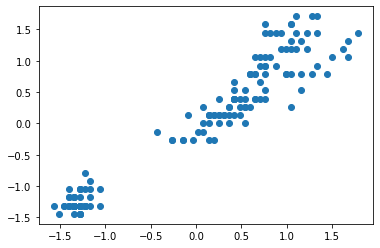

In [130]:
plt.scatter(X[:,0],X[:,1])

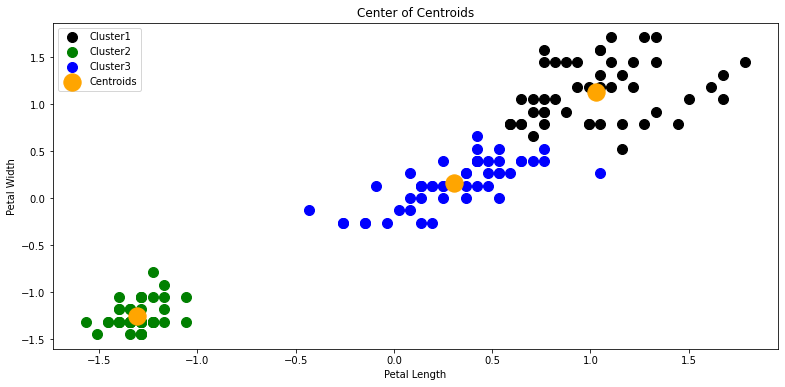

In [131]:
#Visualize the data
plt.figure(figsize=(13,6))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c="black", label ="Cluster1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c="green", label ="Cluster2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c="blue", label ="Cluster3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="orange", label="Centroids")
plt.title("Center of Centroids")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

In [132]:
silhouette_score(X,kmeans.labels_)

0.6736179401065728